There are many functions defined in this notebook to specifically renumber the polling data. However, in the end I used an automated conversion that relied on regex (universal_conv()). This worked for many of the columns, but not for all. However, I am leaving the other methods here because they could be used in the future. Because decision tree sets cutoffs it probably causes the algorithm to be less efficient due to the common classification used "8. Don't Know". If these were encoded as neutral, the algorithm might work more efficiently. This is the main issue that would require hand coded methods. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_pickle('./pickles/anes_2016_NAN_Free.pkl')

In [3]:
data_1 = data

In [5]:
##################################
########  IMPORTANT  #############
##################################

def declair_party(a_str, df):
    """
    R ==> 3. Republicans (including leaners)
    D ==> 1. Democrats (including leaners)
    I ==> 2. Independents
    N ==> 0. DK; NA; other; refused to answer; no Pre IW
    Categories (4, object): [0. DK; NA; other; refused to answer; no Pre IW < 1. Democrats (including leaners) < 2. Independents < 3. Republicans (including leaners)
    """
    ans = df['Party_Identification_of_Respondent__Summary_3_Category_VCF0303'].unique()
    if a_str == ans[0]:
        return 'R'
    elif a_str == ans[1]:
        return 'D'
    elif a_str == ans[2]:
        return 'I'
    elif a_str == ans[3]:
        return 'N'

label = 'Party_Identification_of_Respondent__Summary_3_Category_VCF0303'    
data_1['RDIN'] = data_1[label].apply(declair_party, args=[data_1])
data_1['RDIN'] = data_1['RDIN'].astype(str) 
   

In [6]:
'RDIN' in data_1

True

In [6]:
def fix_VCF0853(a_str, df):
    """VCF0853
    
    MORAL TRADITIONALISM: Should be More Emphasis on Traditional Values
    
    QUESTION:
    ---------
    ALL YEARS: 
    'This country would have many fewer problems if there were more
    emphasis on traditional family ties.'
    (2000,2004: do you agree strongly, agree somewhat, neither agree nor
    disagree, disagree somewhat, or disagree strongly with this statement?)
    
    VALID CODES:
    ------------
    1. Agree strongly
    2. Agree somewhat
    3. Neither agree nor disagree
    4. Disagree somewhat
    5. Disagree strongly
    8. DK
    
    MISSING CODES:
    --------------
    9. NA; Form B (1990); no Post IW
    INAP. question not used"""
    
    label = 'Should_be_More_Emphasis_on_Traditional_Values_VCF0853'
    ans = df[label].unique()
    #[2. Agree somewhat, 3. Neither agree nor disagree, 1. Agree strongly, 9. NA; Form B (1990); no Post IW, 4. Disagree somewhat, 5. Disagree strongly, 8. DK]
    adj = 3
    if a_str == ans[0]:
        return 1+adj
    elif a_str == ans[1]:
        return 0+adj
    elif a_str == ans[2]:
        return 2+adj
    elif a_str == ans[3]:
        return 0+adj #????
    elif a_str == ans[4]:
        return -1+adj
    elif a_str == ans[5]:
        return -2+adj 
    elif a_str == ans[6]:
        return 0+adj    

#print(fix_VCF0853(data_3))


In [10]:
def fix_VCF0847(a_str, df):
    """VCF0847
    
    RELIGIOSITY: How Much Guidance from Religion
    
    QUESTION:
    ---------
    (IF RELIGION IS IMPORTANT: ) Would you say that (1996-LATER: Would you
    say your) religion provides some guidance in your day-to-day living,
    quite a bit of guidance, or a great deal of guidance in your day-to-
    day living (1996-LATER: 'life')?
    
    VALID CODES:
    ------------
    1. Some
    2. Quite a bit
    3. A great deal
    5. Religion not important
    
    MISSING CODES:
    --------------
    8. DK
    0. NA; DK/NA if religion important in R's life; form B (1986); no 
    Post IW; abbrev. telephone IW (1984, see VCF0015); short form or 
    Spanish language (1992)
    INAP. question not used"""
    label = 'How_Much_Guidance_from_Religion_VCF0847'
    ans = df[label].unique()
    
    #ans[0] 3. A great deal                                   ==> 4                   
    #ans[1] 5. Religion not important                         ==> 1                   
    #ans[2] 2. Quite a bit                                    ==> 3                   
    #ans[3] 1. Some                                           ==> 2                   
    #ans[4] 8. DK                                             ==> 1                   
    #ans[5] 0. NA; DK/NA if religion important in R's life;   ==> 1
    
    
    #[3. A great deal, 5. Religion not important, 2. Quite a bit, 1. Some, 8. DK, 0. NA; DK/NA if religion important in R's life;]
    #Categories (6, object): [0. NA; DK/NA if religion important in R's life; < 1. Some < 2. Quite a bit < 3. A great deal < 5. Religion not important < 8. DK]
    
    if a_str == ans[0]:
        return 4
    elif a_str == ans[1]:
        return 1
    elif a_str == ans[2]:
        return 3
    elif a_str == ans[3]:
        return 2 #????
    elif a_str == ans[4]:
        return 1
    elif a_str == ans[5]:
        return 1 



In [8]:
##################################
########  IMPORTANT  #############
##################################


def fix_VCF0232(obj, df):
    import math
    """
    VCF0232	
    
    GROUP THERMOMETER: Gays and Lesbians
    
    QUESTION:
    ---------
    Gay men and lesbians (that is), homosexuals -- thermometer
    
    VALID CODES:
    ------------
    00-96. Degrees as coded
    97. 97-100 Degrees
    
    MISSING CODES:
    --------------
    98. DK; don't recognize
    99. NA; no Post IW
    INAP. question not used
    
    NOTES:
    ------
    GENERAL NOTE:
    See thermometer question text and notes preceding VCF0201.
    """
    label = 'Gays_and_Lesbians_VCF0232'
    ans = df[label].unique()
    #[15, 50, 70, 85, 97. 97-100 Degrees, ..., 43, 36, 92, 22, 34]
    #Length: 93
    #Categories (93, object): [0 < 1 < 2 < 3 ... 96 < 97. 97-100 Degrees < 98. DK; don't recognize < 99. NA; no Post IW]
    
    #self rated 0-100 0-49 negative feelings, 50 neutral, 0-100 positive
    
    #adj = 1
    if type(obj) == float:
        temp_var = obj
    elif obj == '97. 97-100 Degrees':
        temp_var = 97.0
    elif obj == "98. DK; don't recognize":
        temp_var = 50.0 #????
    elif obj == '99. NA; no Post IW':
        temp_var = 50.0
    else:
        raise Exception('ERROR_OBJ_NOT_HANDLED_TR: {obj}, check fix_VCF0232()')
    #returns number 1-10
    return math.floor(temp_var/10)+1




In [9]:
def fix_VCF0854(a_str, df):
    """VCF0854
    
    MORAL TRADITIONALISM: Tolerance of Different Moral Standards
    
    QUESTION:
    ---------
    ALL YEARS: 
    'We should be more tolerant of people who choose to live according to
    their own moral standards, even if they are very different from our own.'
    (2000: do you agree strongly, agree somewhat, neither agree nor
    disagree, disagree somewhat, or disagree strongly with this statement?)
    
    VALID CODES:
    ------------
    1. Agree strongly
    2. Agree somewhat
    3. Neither agree nor disagree
    4. Disagree somewhat
    5. Disagree strongly
    8. DK
    
    MISSING CODES:
    --------------
    9. NA; Form B (1990); no Post IW
    INAP. question not used"""

    #[4. Disagree somewhat, 1. Agree strongly, 2. Agree somewhat, 3. Neither agree nor disagree, 9. NA; Form B (1990); no Post IW, 5. Disagree strongly, 8. DK]
    #Categories (7, object): [1. Agree strongly < 2. Agree somewhat < 3. Neither agree nor disagree < 4. Disagree somewhat < 5. Disagree strongly < 8. DK < 9. NA; Form B (1990); no Post IW]    
    label = 'Tolerance_of_Different_Moral_Standards_VCF0854'
    ans = df[label].unique()
    
    adj = 0
    if a_str == ans[0]:
        return 2+adj
    elif a_str == ans[1]:
        return 5+adj
    elif a_str == ans[2]:
        return 4+adj
    elif a_str == ans[3]:
        return 3+adj #????
    elif a_str == ans[4]:
        return 3+adj
    elif a_str == ans[5]:
        return 1+adj 
    elif a_str == ans[6]:
        return 0+adj 
    
    

In [10]:
def fix_VCF0878(a_str, df):
    """VCF0878
    
    ISSUES: Should Gays/Lesbians Be Able to Adopt Children
    
    QUESTION:
    ---------
    Do you think gay or lesbian couples, in other words, homosexual
    couples, should be legally permitted to adopt children?
    
    VALID CODES:
    ------------
    1. Yes
    5. No
    8. DK
    
    MISSING CODES:
    --------------
    9. NA; no Post IW
    INAP. question not used"""
    
    #ans[0] 5. No               ==> 1                   
    #ans[1] 1. Yes              ==> 3                   
    #ans[2] 8. DK               ==> 2                   
    #ans[3] 9. NA; no Post IW   ==> 2 

    label = 'Should_Gays_Lesbians_Be_Able_to_Adopt_Children_VCF0878'
    ans = df[label].unique() 

    adj = 0
    if a_str == ans[0]:
        return 1+adj
    elif a_str == ans[1]:
        return 3+adj
    elif a_str == ans[2]:
        return 2+adj
    elif a_str == ans[3]:
        return 2+adj #????



In [11]:
def fix_VCF0852(a_str, df):

    #ans[0] 4. Disagree somewhat                              ==> 2                   
    #ans[1] 1. Agree strongly                                 ==> 5                   
    #ans[2] 2. Agree somewhat                                 ==> 4                   
    #ans[3] 3. Neither agree nor disagree                     ==> 3                   
    #ans[4] 9. NA; Form B (1990); no Post IW                  ==> 3                   
    #ans[5] 5. Disagree strongly                              ==> 1                   
    #ans[6] 8. DK                                             ==> 3 
    label = 'Should_Adjust_View_of_Moral_Behavior_to_Changes_VCF0852'
    ans = df[label].unique() 

    if a_str == ans[0]:
        return 2
    elif a_str == ans[1]:
        return 5
    elif a_str == ans[2]:
        return 4
    elif a_str == ans[3]:
        return 3 #???? 
    elif a_str == ans[4]:
        return 10
    elif a_str == ans[5]:
        return 1
    elif a_str == ans[6]:
        return 10 #????


In [7]:
##################################
########  IMPORTANT  #############
##################################


def universal_conv(a_str,df):
    import re
    return re.match(r'(\d.*?)\.', a_str).groups()[0]

In [8]:
##################################
########  IMPORTANT  #############
##################################


def make_table(a_label, df, coding):
    for ind, info in enumerate(df[a_label].unique()):
        print(f'ans[{ind}] ' + f'{info:<50}' + '==>' f' {coding[ind]:<20}')

        
lab1='Should_Adjust_View_of_Moral_Behavior_to_Changes_VCF0852'
df1=data_1
coding=[2,5,4,3,3,1,3]
make_table(lab1, df1, coding)

ans[0] 4. Disagree somewhat                              ==> 2                   
ans[1] 1. Agree strongly                                 ==> 5                   
ans[2] 2. Agree somewhat                                 ==> 4                   
ans[3] 3. Neither agree nor disagree                     ==> 3                   
ans[4] 9. NA; Form B (1990); no Post IW                  ==> 3                   
ans[5] 5. Disagree strongly                              ==> 1                   
ans[6] 8. DK                                             ==> 3                   


In [12]:
##################################
########  IMPORTANT  #############
##################################

def fix_RDIN(a_str, df):
    #nothin needs to happen here, just info through so RDIN can 
    #be treated like columns that need fixing.
    return a_str

In [14]:
##################################
########  IMPORTANT  #############
##################################

def apply_fix(df, label, fix_method):
    return df[label].apply(fix_method, args=[df])

In [9]:
data_2 = data_1.copy()    

labels = {'How_Much_Guidance_from_Religion_VCF0847' : fix_VCF0847,
          'Should_be_More_Emphasis_on_Traditional_Values_VCF0853' : fix_VCF0853,
          'Gays_and_Lesbians_VCF0232': fix_VCF0232,
          'Tolerance_of_Different_Moral_Standards_VCF0854' : fix_VCF0854,
          'Should_Gays_Lesbians_Be_Able_to_Adopt_Children_VCF0878' : fix_VCF0878,
          'Should_Adjust_View_of_Moral_Behavior_to_Changes_VCF0852' : fix_VCF0852,
          
          'RDIN' : fix_RDIN,   
         }

ordinal_cols=[]
current_df = data_2
#print(labels.items())
for label, fix in labels.items():
    #print(f'calling with: {label} {fix}')
    temp = apply_fix(current_df, label, fix)
    ordinal_cols.append(temp)

#check corrections    
for oc in ordinal_cols:
    print(oc.values[0:10])

NameError: name 'fix_VCF0847' is not defined

In [15]:
##################################
########  IMPORTANT  #############
##################################

data_2 = data_1.copy()    

#labels = {#Deference to Authority
#          'Respondent_Church_Attendance_1970__VCF0130' : universal_conv,    
#          'Is_Religion_Important_to_Respondent_VCF0846' : universal_conv,
#          'How_Much_Guidance_from_Religion_VCF0847' : universal_conv,
#          #Novelty--open to change
#          'Newer_Lifestyles_Contribute_to_Society_Breakdown_VCF0851' : universal_conv,
#          'Should_Adjust_View_of_Moral_Behavior_to_Changes_VCF0852' : universal_conv,
#          'Should_be_More_Emphasis_on_Traditional_Values_VCF0853' : universal_conv,
#          'Tolerance_of_Different_Moral_Standards_VCF0854' : universal_conv,
#          'Law_to_Protect_Homosexuals_Against_Discrimination_VCF0876' : universal_conv,
#          'Strength_of_Position_on_Law_to_Protect_Homosexuals_Against_Discrimination_VCF0876a' : universal_conv,
#          'Should_Gays_Lesbians_Be_Able_to_Adopt_Children_VCF0878' : universal_conv,
#          'Gays_and_Lesbians_VCF0232' : fix_VCF0232,    
#          'Respondent_Education_4_category_VCF0110' : universal_conv,
#          'Respondent_Education_6_category_VCF0140' : universal_conv,
#          
#          'RDIN' : fix_RDIN,   
#         }

#hand selected columns 
best_columns = {
##FAMILY/WORK/Social status
'Race_ethnicity_summary,_7_categories_VCF0105a' : universal_conv,
#'Respondent_Parents_Native_Born_VCF0143',
#'Respondent_Marital_Status_VCF0147',
#'Respondent_Work_Status_7_category_VCF0116',
#'Respondent_Work_Status_5_category_VCF0118',
#'Respondent_Work_Status_16_category_VCF0150',
#'Respondent_Social_Class_8_category_VCF0148',
'Respondent_Think_of_Self_as_Member_of_Social_Class_VCF0149' :universal_conv,
#
##Deference to Authority
#'Respondent_Church_Attendance_1970__VCF0130' : universal_conv,    
'Is_Religion_Important_to_Respondent_VCF0846' : universal_conv,
#'How_Much_Guidance_from_Religion_VCF0847' : universal_conv,
#
##Novelty--open to change
'Newer_Lifestyles_Contribute_to_Society_Breakdown_VCF0851' : universal_conv,
'Should_Adjust_View_of_Moral_Behavior_to_Changes_VCF0852' : universal_conv,
'Should_be_More_Emphasis_on_Traditional_Values_VCF0853' : universal_conv,
#'Tolerance_of_Different_Moral_Standards_VCF0854' : universal_conv,
#'Law_to_Protect_Homosexuals_Against_Discrimination_VCF0876',
#'Strength_of_Position_on_Law_to_Protect_Homosexuals_Against_Discrimination_VCF0876a',
#'Should_Gays_Lesbians_Be_Able_to_Adopt_Children_VCF0878',
#'Gays_and_Lesbians_VCF0232' : universal_conv,    
#'Respondent_Education_4_category_VCF0110',
#'Respondent_Education_6_category_VCF0140' : universal_conv,
#    
##GOV   
#'Federal_Spending__Dealing_with_Crime_VCF0888' : universal_conv,
#'Federal_Spending__Public_Schools_VCF0890',
#'Federal_Spending__Improve_and_Protect_the_Environment_VCF9047' : universal_conv,
#'Federal_Spending__Space_Science_Technology_VCF9048' : universal_conv,
'Federal_Spending__Social_Security_VCF9049' : universal_conv,
'Less_Government_Better_OR_Government_Do_More_VCF9131' : universal_conv,
#'Govt_Handle_Economy_OR_Free_Market_Can_Handle_VCF9132' : universal_conv,
'Govt_Too_Involved_in_Things_OR_Problems_Require_VCF9133' : universal_conv,
#'Trust_in_Government_Index_VCF0656' : universal_conv,
#'Government_Health_Insurance_Scale_VCF0806' : universal_conv,
#'Guaranteed_Jobs_and_Income_Scale_VCF0809',
#'Government_Services_Spending_Scale_VCF0839',
#'Defense_Spending_Scale_VCF0843' ,
#'Federal_Government_Run_by_Few_Interests_or_for_the_Benefit_of_All_VCF0605',
'How_Much_Does_the_Federal_Government_Waste_Tax_Money_VCF0606' : universal_conv,
#'Government_Officials_Care_What_People_Like_Respondent_Think_VCF0609',
'People_like_Respondent_Have_Any_Say_in_What_the_Government_Does_VCF0613' : universal_conv,
#    
##tribalism
#'Illegal_Aliens_VCF0233' : fix_VCF0232,
#'Better_off_if_U.S._Unconcerned_with_Rest_of_World_VCF0823', 
#'Increase_or_Decrease_Number_of_Immigrants_to_U.S._6_Category_VCF0879',
'Increase_or_Decrease_Number_of_Immigrants_to_U.S._4_Category_VCF0879a' : universal_conv,
#'Aid_to_Blacks_Scale_VCF0830' : universal_conv,
'Conditions_Make_it_Difficult_for_Blacks_to_Succeed_VCF9039' : universal_conv,
#'Blacks_Should_Not_Have_Special_Favors_to_Succeed_VCF9040' : universal_conv,
'Blacks_Must_Try_Harder_to_Succeed_VCF9041' : universal_conv,
#'Blacks_Gotten_Less_than_They_Deserve_Over_the_Past_Few_Years_VCF9042' : universal_conv,
#    
##inequality    
#'Society_Ensure_Equal_Opportunity_to_Succeed_VCF9013',
'Not_Big_Problem_if_Some_Have_More_Chance_in_Life_VCF9016' : universal_conv,
'Should_Worry_less_about_How_Equal_People_Are_VCF9017' : universal_conv,
#'U.S._Fewer_Problems_if_Everyone_Treated_Equally_VCF9018' : universal_conv,
'Federal_Spending__Welfare_Programs_VCF0894' : universal_conv,
#'Federal_Spending__Poor_Poor_People_VCF0886', 
#'Federal_Spending__Poor_Poor_People_VCF0886',
#'Federal_Spending__Child_Care_VCF0887',    
#'Affirmative_Action_in_Hiring_Promotion_[1_of_2]_VCF0867',
'Affirmative_Action_in_Hiring_Promotion_[2_of_2]_VCF0867a' : universal_conv ,    
#'Poor_People_VCF0223',
#'Big_Business_VCF0209' : universal_conv, 
#'Labor_Unions_VCF0210',    
#'Household_Who_Belongs_to_Union_8_category_VCF0127a' : universal_conv,    
#
##party affiliation    
'RDIN' : fix_RDIN,  
}


ordinal_cols=[]
current_df = data_2
#print(labels.items())
for label, fix in best_columns.items():
    #print(f'calling with: {label} {fix}')
    temp = apply_fix(current_df, label, fix)
    #temp2 = [int(x) for x in temp]
    #print(type(temp))
    ordinal_cols.append(temp)

#check corrections    
#for oc in ordinal_cols:
#    print(oc.values[0:10])



df1 = pd.concat(ordinal_cols, axis=1)
df1.head()

X = df1.iloc[:, :-1]
Q = X.apply(pd.to_numeric)
y = df1.RDIN

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Q, y)
predicted = model.predict(Q)
#model.score(Q,y)

from sklearn.metrics import classification_report
report = classification_report(y, predicted)
print(report)


#correct = 0
#total = 200
#for ind, pred in enumerate(model.predict(Q[0:total])):
#    if y[ind] == p:
#        correct+=1
#    print(y[ind],pred)
#print(correct/total)


             precision    recall  f1-score   support

          D       0.65      0.76      0.70      1939
          I       0.13      0.00      0.01       579
          N       0.44      0.17      0.25        23
          R       0.63      0.73      0.68      1729

avg / total       0.57      0.64      0.59      4270



## pickle the X files for RANDOM FORREST

In [16]:
df1.to_pickle('./pickles/politics_17features_02.pkl')
#data = pd.read_pickle('./pickles/anes_2016_NAN_Free.pkl')

In [17]:
!ls ./pickles/

20181021_184052_clarify.pkl 20181021_202612_clarify.pkl
20181021_184249_clarify.pkl 20181021_202630_clarify.pkl
20181021_184915_clarify.pkl 20181021_202653_clarify.pkl
20181021_185328_clarify.pkl 20181021_202706_clarify.pkl
20181021_185801_clarify.pkl 20181021_202735_clarify.pkl
20181021_190009_clarify.pkl 20181021_202845_clarify.pkl
20181021_190207_clarify.pkl 20181021_202900_clarify.pkl
20181021_190412_clarify.pkl 20181021_203005_clarify.pkl
20181021_190633_clarify.pkl 20181021_203024_clarify.pkl
20181021_191350_clarify.pkl 20181021_203512_clarify.pkl
20181021_202235_clarify.pkl anes_2016_NAN_Free.pkl
20181021_202407_clarify.pkl anes_column_names_1.pkl
20181021_202440_clarify.pkl politics_17features_01.pkl
20181021_202505_clarify.pkl politics_17features_02.pkl


/Users/timrand/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:2495: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ylabelsize=ylabelsize, yrot=yrot, **kwds)


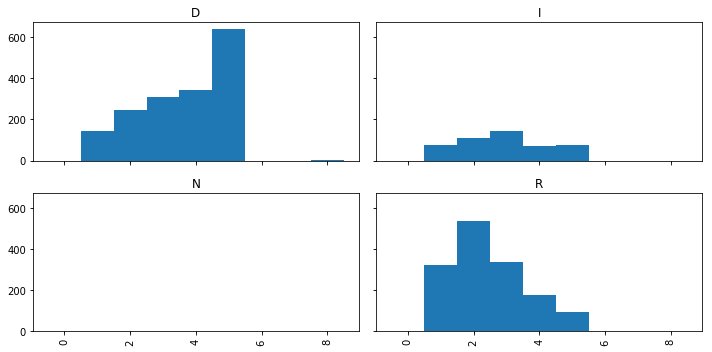

In [19]:
Q = X.apply(pd.to_numeric)
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
Q['Should_Worry_less_about_How_Equal_People_Are_VCF9017'].hist(by=y, ax=ax, sharex=True, sharey=True, bins=[x-0.5 for x in list(range(0,10))])
                 
plt.tight_layout()